## Process L3 satellite ocean color products for climatology 




In [4]:
# setup 

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy
import earthaccess
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
import os
import netCDF4 


In [11]:
# see data accumulated in directory 

#os.listdir('/home/vboatwright/santalucia/L3_2024trial/')
path = '/home/vboatwright/santalucia/L3_2010-2024_9km/'
files = os.listdir(path)


In [12]:
# sort the files by date 

# dates are sorted for these at characters 12:20 
sorted_files = sorted(files, key=lambda x: x[12:20])

example = sorted_files[0]
S = netCDF4.Dataset(path+example) 

# process each file by date 
date_intervals = []
dates = []



In [13]:
S

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: AQUA_MODIS.20100101_20100108.L3m.8D.CHL.chlor_a.9km.nc
    instrument: MODIS
    title: MODISA Level-3 Standard Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    source: satellite observations from MODIS-Aqua
    temporal_range: 8-day
    processing_version: R2022.0
    date_created: 2022-07-25T19:11:26.000Z
    history: l3mapgen par=AQUA_MODIS.20100101_20100108.L3m.8D.CHL.chlor_a.9km.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2010-01-01T00:25:01.000Z
    time_coverage_end: 2010-01-09T03:00:00.000Z
    start_orbit_number: 40757
    end_orbit_number: 40875
    map_projection: Equidistant Cylindrical
    latitude_units: degrees_north
    longitude_units: degrees_east
    northernmost_latitude: 90.0
    s

In [52]:
chl_nc = S['chlor_a'][:]
chl = chl_nc.data
chl[chl_nc.mask==True]=np.nan

lon = S['lon'][:].data
lat = S['lat'][:].data


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32767.0,
  dtype=float32)

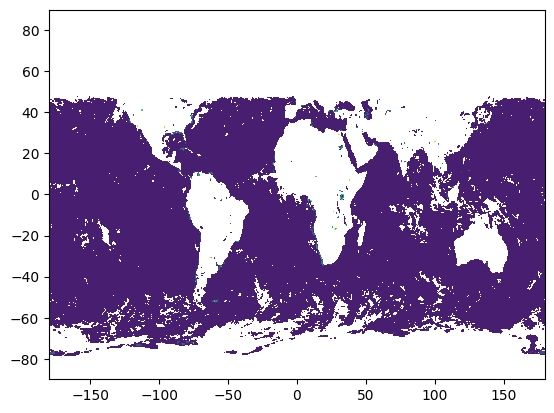

In [53]:
plt.contourf(lon,lat,chl)

In [57]:
chl.shape

(2160, 4320)

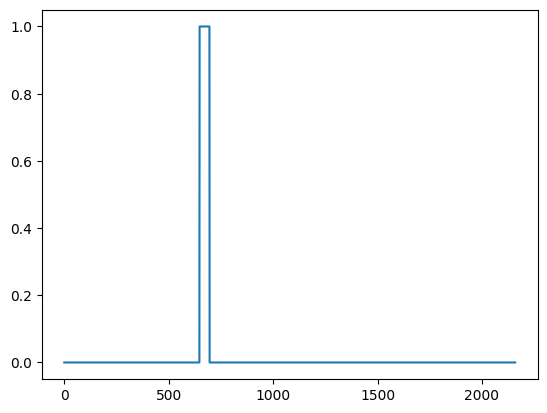

In [63]:
plt.plot(ybounds)

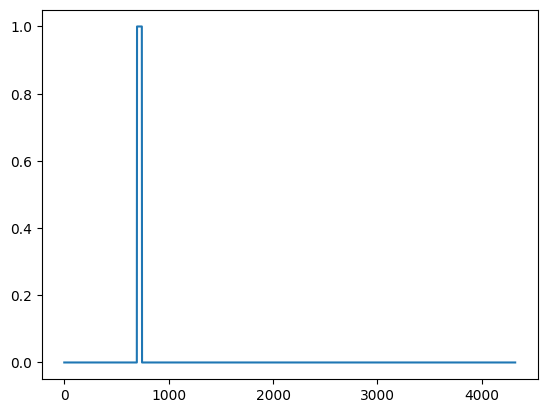

In [64]:
plt.plot(xbounds)

In [77]:
xb

array([696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708,
       709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721,
       722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734,
       735, 736, 737, 738, 739, 740, 741, 742, 743])

In [73]:
chl_select

array([[2.4222944 , 5.0586276 , 4.5452166 , 2.1866333 , 5.7567134 ,
        6.5761995 , 4.271718  , 4.464214  , 2.6441898 , 2.8365035 ,
        3.286074  , 4.944367  , 3.0008426 , 4.7623987 , 6.349297  ,
        5.9550476 , 3.2867754 , 1.5015022 , 1.214956  , 0.7428264 ,
        1.4356726 , 1.8036072 , 2.3026505 , 3.7072115 , 0.5426251 ,
        0.40343612, 0.6452407 , 2.1249404 , 0.47520232, 0.71282274,
        0.4447026 , 0.37151593, 0.4249061 , 0.38870066, 0.39199623,
        0.4614268 , 0.5081209 , 0.45405802, 0.3941851 , 0.38888976,
        0.40125674, 0.336739  , 0.30792767, 0.30936185, 0.30960393,
        0.3699817 , 0.35849267, 0.34507656]], dtype=float32)

TypeError: Input z must be 2D, not 1D

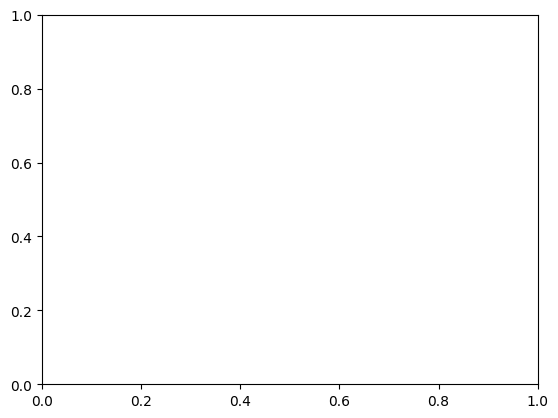

In [76]:
# now save only the area of interest 

xmin = -122
xmax = -118

ymin = 32
ymax = 36

# select only the region of interest 

xbounds = np.logical_and(lon>=xmin,lon<=xmax)
xb = np.nonzero(xbounds==True)[0]
ybounds = np.logical_and(lat>=ymin,lat<=ymax)
yb = np.nonzero(ybounds==True)[0]

# chl shape = (2160,4320) ; lon = 4320; lat = 2160 
# aka, chl shape = (lat,lon)

chl_select = chl[yb,xb]

plt.contourf(chl_select)

In [ ]:
# chatgpt use as you go victoria ! 



# Create boolean masks for lat and lon
lat_mask = (lat >= ymin) & (lat <= ymax)
lon_mask = (lon >= xmin) & (lon <= xmax)

# Apply masks to the chlorophyll data
chl_select = chl[np.ix_(lat_mask, lon_mask)]

In [43]:
chl

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [44]:
chl.shape

(2160, 4320)

In [45]:
lon.shape

(4320,)

In [47]:
chl_select = chl[ybounds,xbounds]


In [ ]:
chl[chl==-32767.0] = np.nan

In [ ]:

for file in sorted_files:
    start_date = file[12:20]  # Extract the start date (YYYYMMDD)
    end_date = file[21:29]    # Extract the end date (YYYYMMDD)
    date_intervals.append((start_date, end_date))
    dates.append(start_date)

    dataset = xr.open_dataset(path+ff) 
    chl = dataset["chlor_a"]

